<a href="https://colab.research.google.com/github/balanajiii/Project-1/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


#**READING DATA**


In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
#get columns that has nulls only
display(pd.DataFrame(df.isnull().sum()).loc[df.isnull().sum()>0].T)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,259,1369,872,8,37,37,38,37,38,1,690,81,81,81,81,81,1453,1179,1406


In [ ]:
df.duplicated().sum()

0

In [ ]:
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    df.SalePrice.min(), df.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    df.SalePrice.mean(), df.SalePrice.median()))

The cheapest house sold for $34,900 and the most expensive for $755,000
The average sales price is $180,921, while median is $163,000


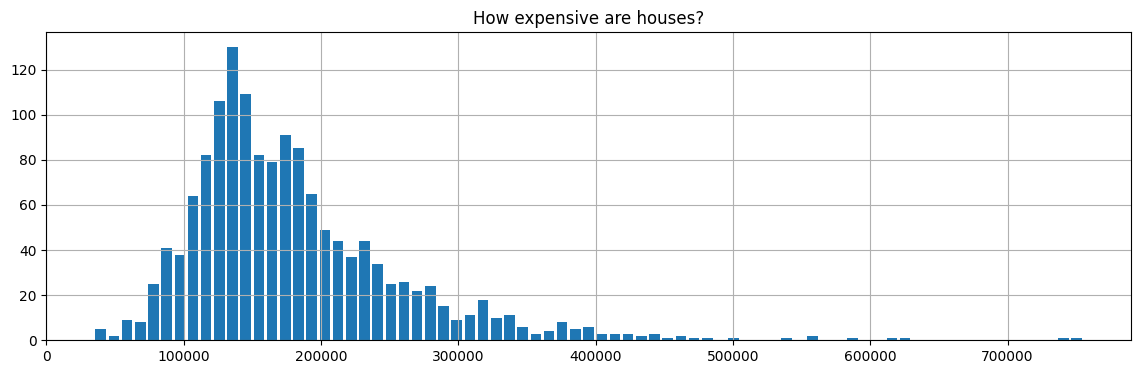

In [ ]:
df.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

In [ ]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    df.YearBuilt.min(), df.YearBuilt.max()))

Oldest house built in 1872. Newest house built in 2010.


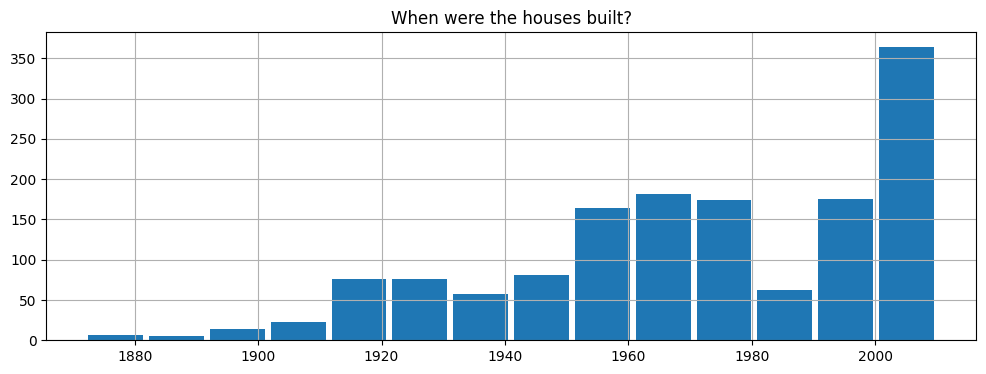

In [ ]:
df.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

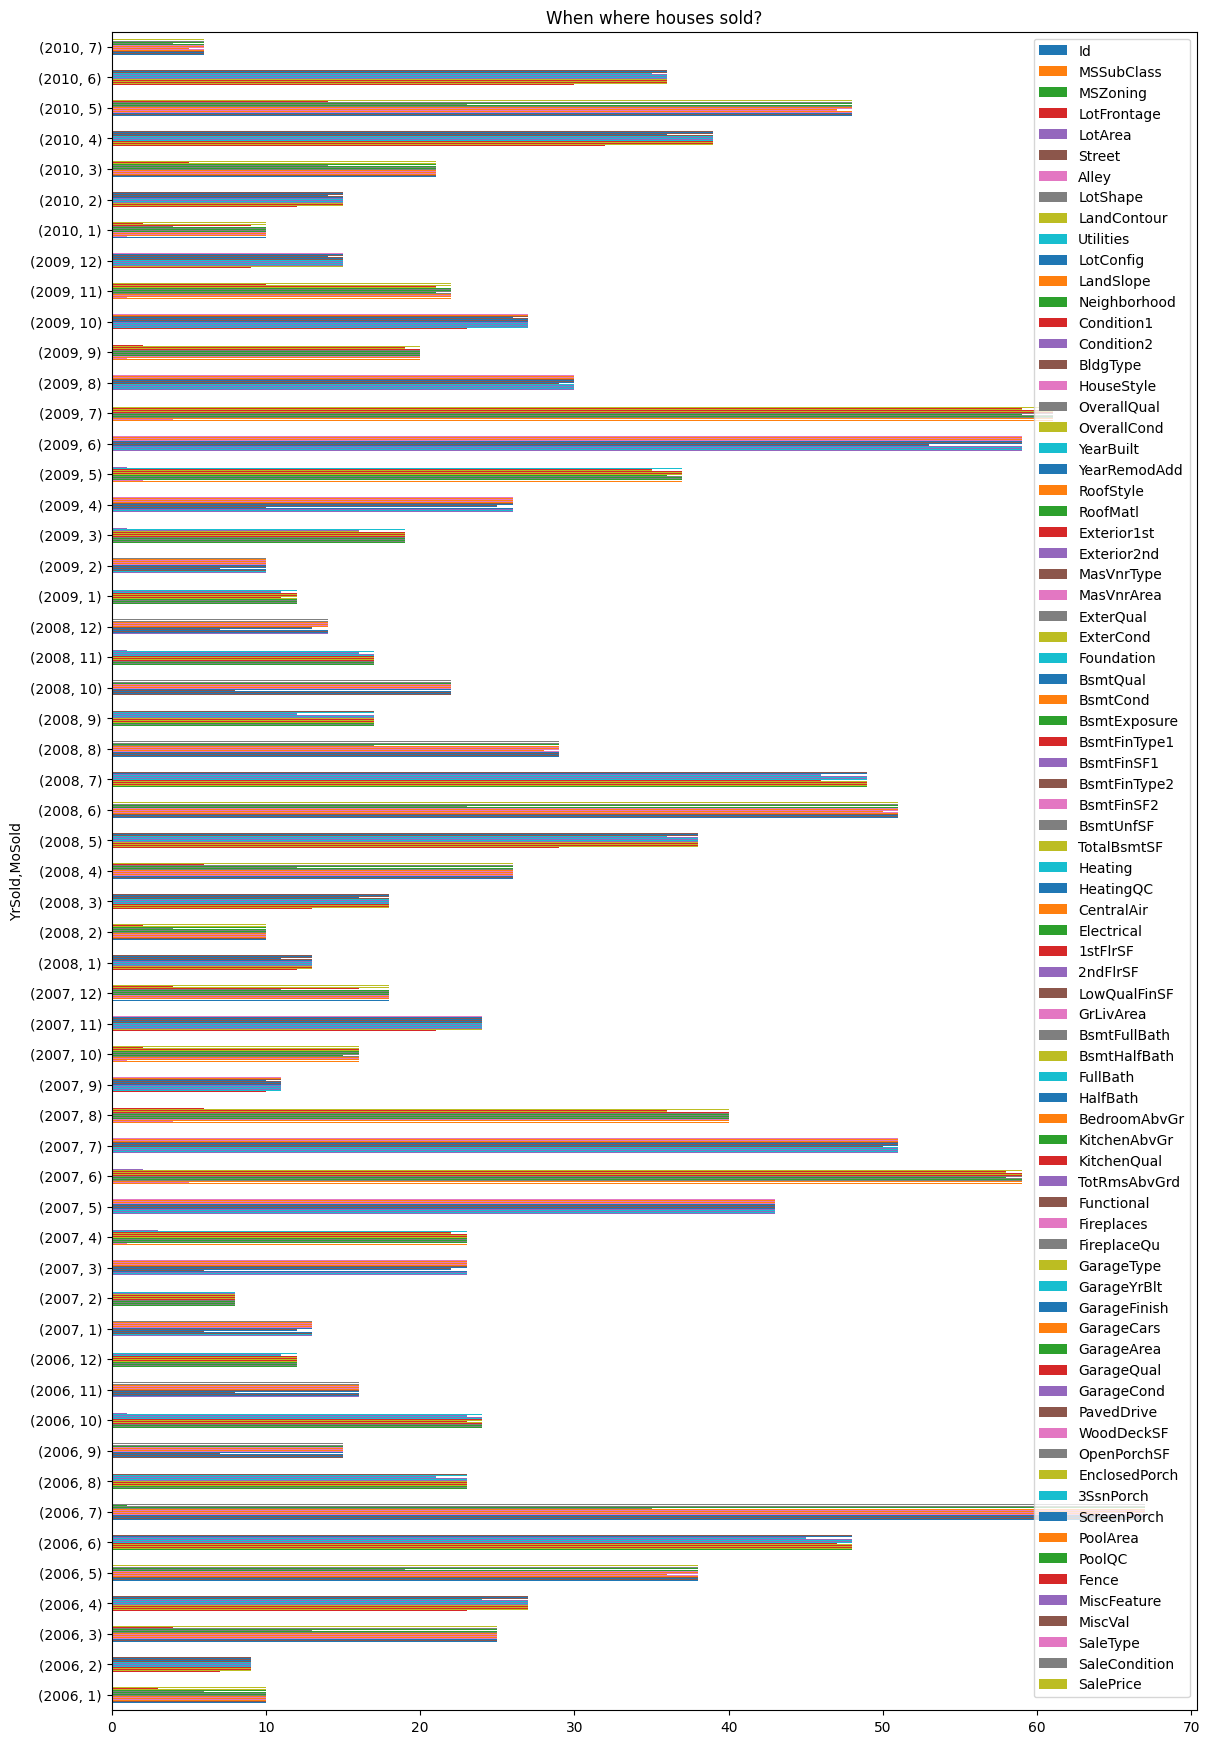

In [ ]:
# When where houses sold?
df.groupby(['YrSold','MoSold']).count().plot(kind='barh', figsize=(14,21.8))
plt.title('When where houses sold?')
plt.show()

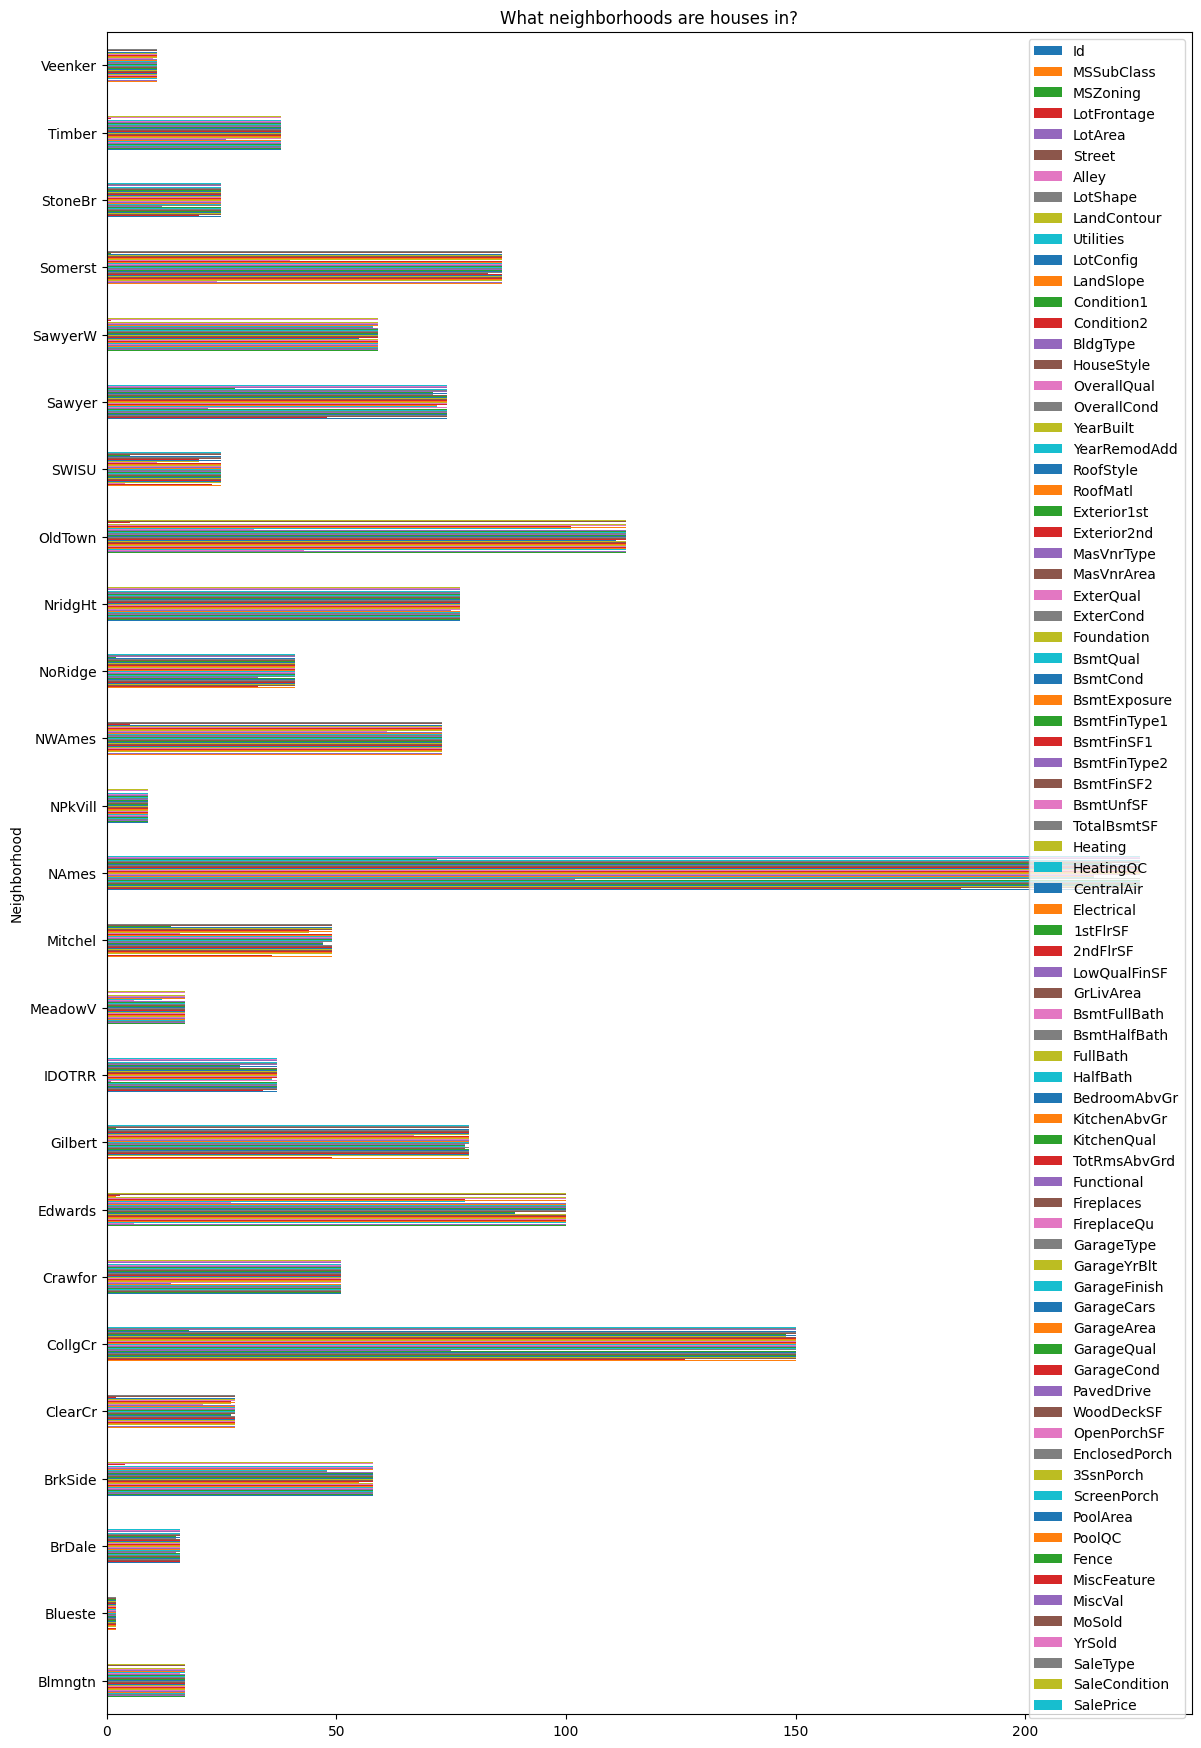

In [ ]:
# Where are houses?

df.groupby('Neighborhood').count().plot(kind='barh', figsize=(14,21.85))
plt.title('What neighborhoods are houses in?')
plt.show()

In [ ]:
from scipy import stats

<ipython-input-19-3077851849be>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)


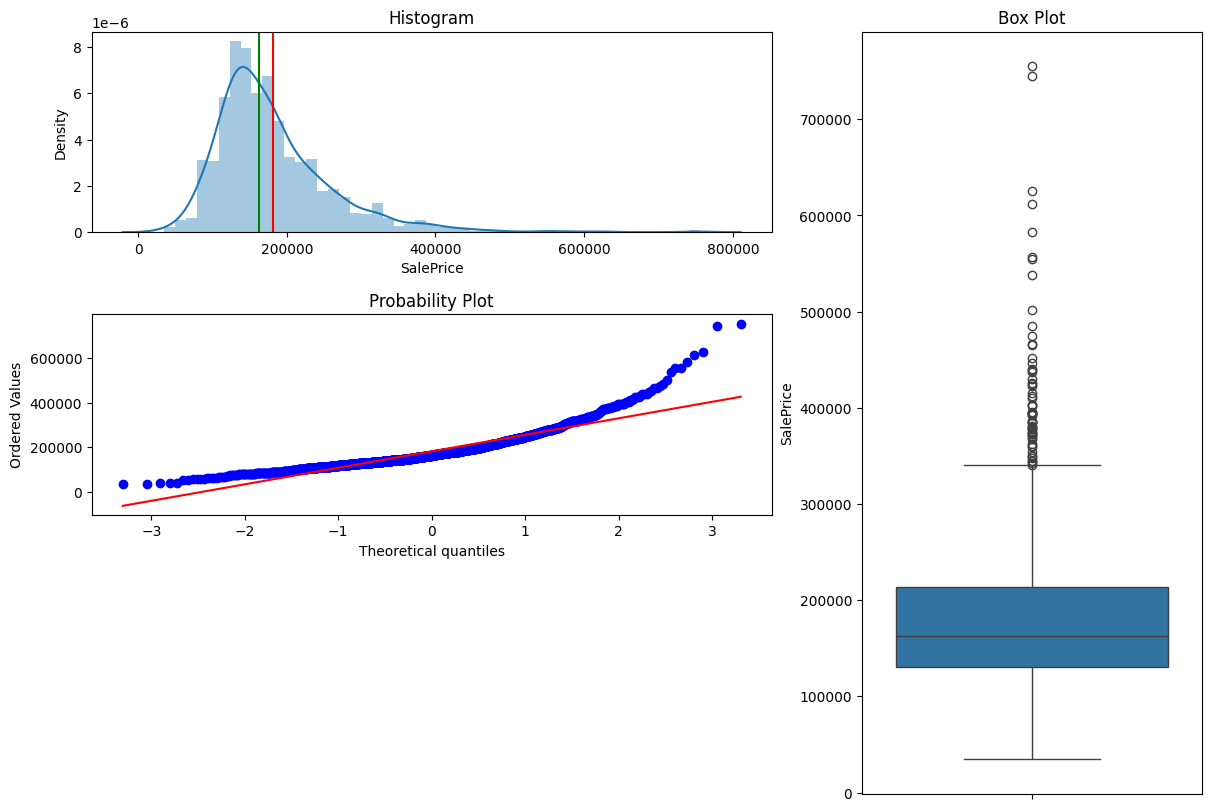

In [ ]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')

    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title.
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )

three_chart_plot(df, 'SalePrice')

In [ ]:
from scipy.stats import skew
print("Skewness of the SalesPrice is", df['SalePrice'].skew())

Skewness of the SalesPrice is 1.8828757597682129


#**PREPROCESSING**

In [ ]:
# get LotFrontage with respect to columes that has realtion to LotFrontage
LotFrontage= df.loc[ :,["LotFrontage","MSZoning","Neighborhood","MSSubClass","SaleCondition",'SalePrice']]
# get null LotFrontage only
nullLotFrontage = LotFrontage["LotFrontage"].isnull()

# display info of LotFrontage grouped by MSZoning
display(LotFrontage[["LotFrontage","MSZoning"]].groupby("MSZoning").agg(['count',np.nanmean,np.nanmedian,np.nanmin,np.nanmax]))
# display null LotFrontage grouped by MSZoning
display(LotFrontage.loc[nullLotFrontage,["LotFrontage","MSZoning"]].groupby("MSZoning").agg(['size']))

#impute LotFrontage with rolling mean of ordered dataframe
LotFrontage= LotFrontage.sort_values(["MSZoning","Neighborhood","MSSubClass","SaleCondition",'SalePrice']).reset_index()
LotFrontage["LotFrontage"] = LotFrontage["LotFrontage"].fillna(LotFrontage["LotFrontage"].rolling(3,min_periods=1).mean())
LotFrontage["LotFrontage"] = LotFrontage["LotFrontage"].fillna(LotFrontage["LotFrontage"].rolling(5,min_periods=1).mean())
df["LotFrontage"] = LotFrontage.set_index('index').loc[:,"LotFrontage"]

#print((houses.loc[~nullLotFrontage,"LotFrontage"]-LotFrontage.set_index('index').loc[~nullLotFrontage,"LotFrontage"]).sum())
print("df[LotFrontage] for nulls",df["LotFrontage"].isnull().sum())

LotFrontage                                   
               count    nanmean nanmedian nanmin nanmax
MSZoning                                               
C (all)           10  69.700000      60.0   50.0  120.0
FV                57  59.491228      65.0   24.0  102.0
RH                13  58.923077      60.0   34.0   82.0
RL               922  74.680043      72.0   24.0  313.0
RM               199  52.366834      51.0   21.0  153.0

,LotFrontage
,size
MSZoning,
FV,8
RH,3
RL,229
RM,19


df[LotFrontage] for nulls 1


In [ ]:
display(df["Alley"].value_counts())
AlleyImputer = SimpleImputer(missing_values=np.nan,
                                     strategy='constant',
                                     fill_value="No_Alley"
                                    )

df.loc[ :,"Alley"]=AlleyImputer.fit_transform(X = df.loc[ :,"Alley"].values.reshape(-1, 1))
print(pd.unique(df.loc[ :,"Alley"]))
del(AlleyImputer)

Alley
No_Alley    1369
Grvl          50
Pave          41
Name: count, dtype: int64

['No_Alley' 'Grvl' 'Pave']


In [ ]:
print(df.shape)
# MasVnrArea , MasVnrType
display(df["MasVnrType"].value_counts())
print(df.loc[ df["MasVnrType"].isnull() ,"MasVnrArea"])
# MasVnrArea and MasVnrType has the same nans
print(df.shape)
df= df.loc[ ~df["MasVnrType"].isnull() ,:]
print(df.shape)
df= df.loc[ ~df["MasVnrType"].isnull() ,:]
df["MasVnrType"].fillna('ffill',inplace=True)
print(df["MasVnrType"].isnull().sum())
df.shape

(1460, 81)


MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

1       0.0
3       0.0
5       0.0
8       0.0
9       0.0
       ... 
1454    0.0
1455    0.0
1457    0.0
1458    0.0
1459    0.0
Name: MasVnrArea, Length: 872, dtype: float64
(1460, 81)
(588, 81)
0


(588, 81)

In [ ]:
# BsmtQual , BsmtCond ,BsmtFinType1 ,BsmtFinType1 ,BsmtExposure -> na means no Basement so impute na with no bs
display(df.loc[ :,["BsmtQual","BsmtCond"]].apply(pd.value_counts,axis=0))
display(df.loc[ :,["BsmtFinType1","BsmtFinType2"]].apply(pd.value_counts,axis=0))
display(df.loc[ :,["BsmtExposure"]].apply(pd.value_counts,axis=0))

BasementImputer =SimpleImputer(missing_values=np.nan,
                                     strategy='constant',
                                     fill_value="No BS")
bs = ["BsmtQual","BsmtCond","BsmtFinType1","BsmtFinType2","BsmtExposure"]
df.loc[ :,bs ]=BasementImputer.fit_transform(X = df.loc[ :,bs].values.reshape(-1, 5))
df.loc[ :,bs ]=BasementImputer.transform(X = df.loc[ :,bs].values.reshape(-1, 5))
df.loc[ :,bs ]=BasementImputer.transform(X = df.loc[ :,bs].values.reshape(-1, 5))

display(df.loc[ :,["BsmtQual","BsmtCond"]].apply(pd.value_counts,axis=0))
display(df.loc[ :,["BsmtFinType1","BsmtFinType2"]].apply(pd.value_counts,axis=0))
display(df.loc[ :,["BsmtExposure"]].apply(pd.value_counts,axis=0))

del(BasementImputer,bs)

,BsmtQual,BsmtCond
Ex,98,NaN
Fa,3,7.0
Gd,294,26.0
TA,188,550.0


,BsmtFinType1,BsmtFinType2
ALQ,77,8
BLQ,53,10
GLQ,251,1
LwQ,19,17
Rec,50,18
Unf,133,528


,BsmtExposure
BsmtExposure,
No,341
Av,118
Gd,81
Mn,42


,BsmtQual,BsmtCond
Ex,98,NaN
Fa,3,7.0
Gd,294,26.0
No BS,5,5.0
TA,188,550.0


,BsmtFinType1,BsmtFinType2
ALQ,77,8
BLQ,53,10
GLQ,251,1
LwQ,19,17
No BS,5,6
Rec,50,18
Unf,133,528


,BsmtExposure
BsmtExposure,
No,341
Av,118
Gd,81
Mn,42
No BS,6


In [ ]:
display(df.loc[ :,["FireplaceQu"]].apply(pd.value_counts,axis=0))

FireplacImputer = SimpleImputer(missing_values=np.nan,
                                     strategy='constant',
                                     fill_value="No FB"  #"No FB" -> no fireplace
                                    )
df.loc[ :,["FireplaceQu"] ]=FireplacImputer.fit_transform(X = df.loc[ :,["FireplaceQu"]].values.reshape(-1, 1))
df.loc[ :,["FireplaceQu"] ]=FireplacImputer.transform(X = df.loc[ :,["FireplaceQu"]].values.reshape(-1, 1))
df.loc[ :,["FireplaceQu"] ]=FireplacImputer.transform(X = df.loc[ :,["FireplaceQu"]].values.reshape(-1, 1))

display(df.loc[ :,["FireplaceQu"]].apply(pd.value_counts,axis=0))
del(FireplacImputer)

,FireplaceQu
FireplaceQu,
Gd,191
TA,164
Ex,16
Fa,15
Po,6


,FireplaceQu
FireplaceQu,
No FB,196
Gd,191
TA,164
Ex,16
Fa,15
Po,6


In [ ]:
display(df.loc[ :,["GarageCond","GarageQual"]].apply(pd.value_counts,axis=0))
display(df.loc[ :,["GarageFinish"]].apply(pd.value_counts,axis=0))

GarageImputer= SimpleImputer(missing_values=np.nan,
                                     strategy='constant',
                                     fill_value="No G" )
g= ["GarageType","GarageFinish","GarageQual","GarageCond"]
df.loc[ :, g]=GarageImputer.fit_transform(X = df.loc[ :,g].values.reshape(-1, 4))
df.loc[ :, g]=GarageImputer.transform(X = df.loc[ :,g].values.reshape(-1, 4))
df.loc[ :, g]=GarageImputer.transform(X = df.loc[ :,g].values.reshape(-1, 4))

display(df.loc[ :,["GarageCond","GarageQual"]].apply(pd.value_counts,axis=0))
display(df.loc[ :,["GarageFinish"]].apply(pd.value_counts,axis=0))

noGarag = 1600
print(df["GarageYrBlt"].dtype)
df["GarageYrBlt"].fillna(noGarag,inplace=True)
df["GarageYrBlt"].fillna(noGarag,inplace=True)
df["GarageYrBlt"].fillna(noGarag,inplace=True)
del(GarageImputer,g)

,GarageCond,GarageQual
TA,575,577
Gd,5,4
Fa,2,1


,GarageFinish
GarageFinish,
RFn,234
Fin,204
Unf,144


,GarageCond,GarageQual
TA,575,577
No G,6,6
Gd,5,4
Fa,2,1


,GarageFinish
GarageFinish,
RFn,234
Fin,204
Unf,144
No G,6


float64


In [ ]:
df["PoolQC"].fillna("NP",inplace=True)
df["Fence"].fillna("NF",inplace=True)
df["MiscFeature"].fillna("NM",inplace=True)

df["PoolQC"].fillna("NP",inplace=True)
df["Fence"].fillna("NF",inplace=True)
df["MiscFeature"].fillna("NM",inplace=True)

df["PoolQC"].fillna("NP",inplace=True)
df["Fence"].fillna("NF",inplace=True)
df["MiscFeature"].fillna("NM",inplace=True)

In [ ]:
display(df["Electrical"].value_counts())
ElectricalImputer = SimpleImputer(missing_values=np.nan,
                                     strategy='constant',
                                     fill_value="No_Electrical"
                                    )

df.loc[ :,"Electrical"]=ElectricalImputer.fit_transform(X = df.loc[ :,"Electrical"].values.reshape(-1, 1))
print(pd.unique(df.loc[ :,"Electrical"]))
del(ElectricalImputer)

Electrical
SBrkr    570
FuseA     12
FuseF      6
Name: count, dtype: int64

['SBrkr' 'FuseF' 'FuseA']


In [ ]:
display(pd.DataFrame(df.isnull().sum()).loc[df.isnull().sum()>0])

,0
LotFrontage,1


In [ ]:
df['LotFrontage'].fillna('No_LotFrontage', inplace=True)


In [ ]:
display(pd.DataFrame(df.isnull().sum()).loc[df.isnull().sum()>0])

,0


In [ ]:
display(pd.DataFrame(df.dtypes[df.dtypes == "object"]).T)

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object


#**EDA (EXPLORATORY DATA ANALYSIS)**

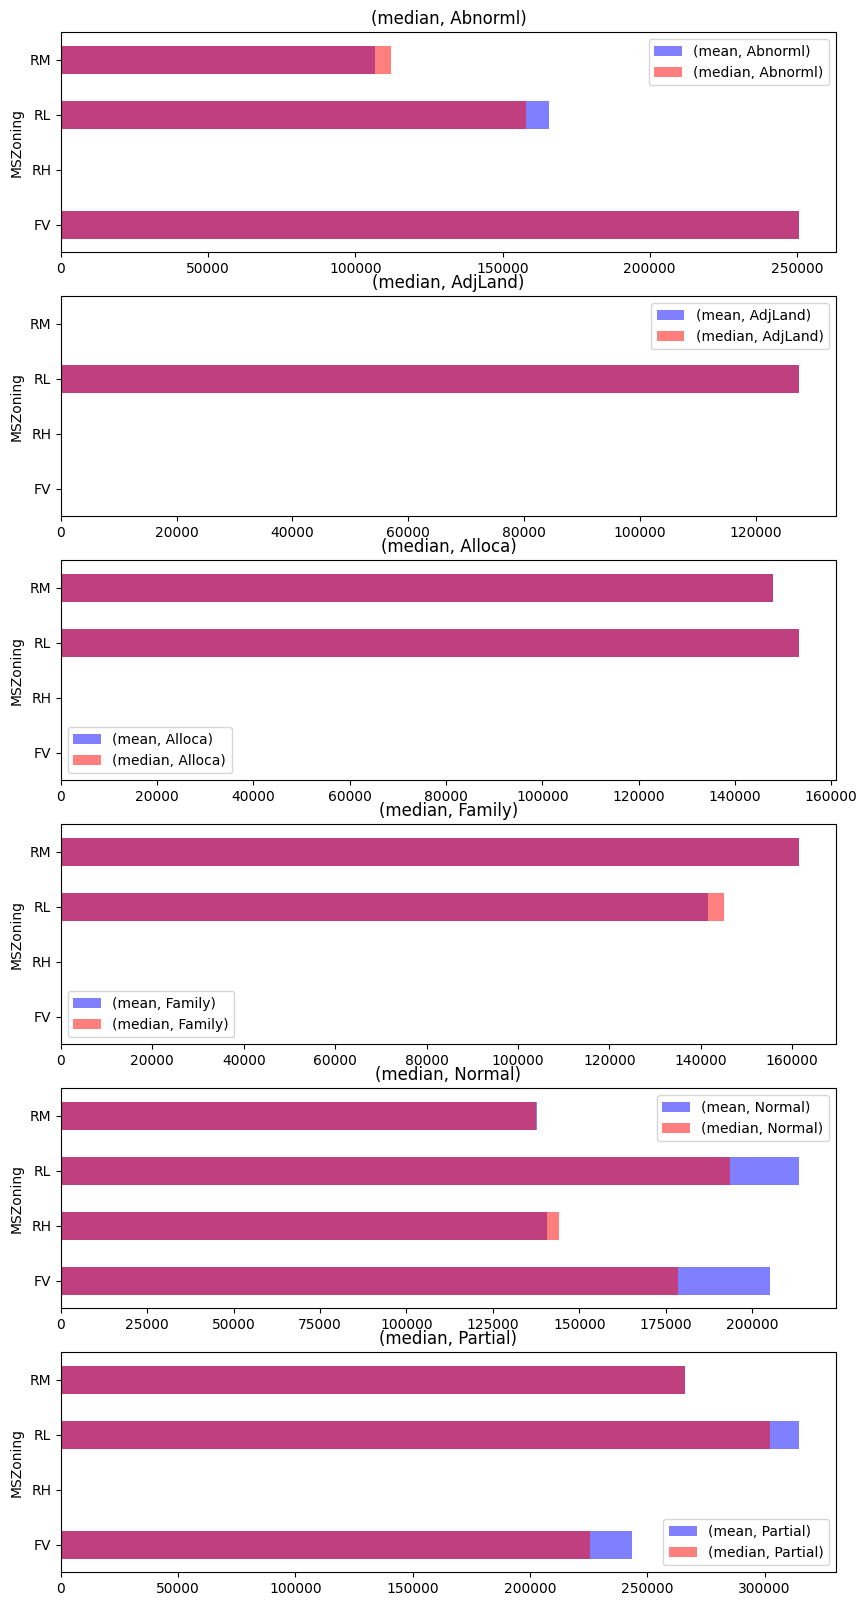

In [ ]:
fig, ax = plt.subplots(6,1,figsize=(10,20))
df.loc[:,["MSZoning","SaleCondition","SalePrice"]].groupby(["MSZoning","SaleCondition"]).agg(
mean= ("SalePrice",'mean'),
).sort_values('mean').unstack().plot.barh(alpha=.5,color="Blue",subplots=True,ax=ax)

df.loc[:,["MSZoning","SaleCondition","SalePrice"]].groupby(["MSZoning","SaleCondition"]).agg(
median= ("SalePrice",'median')
).sort_values('median').unstack().plot.barh(alpha=.5,color= "Red",subplots=True,ax=ax)
plt.legend();

In [ ]:
g = df.loc[df["SaleCondition"] == "Normal",["MSZoning","SalePrice"]].groupby("MSZoning").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["MSZoning"] = df["MSZoning"].map(g['median'])

g = df.loc[:,["SaleCondition","SalePrice"]].groupby("SaleCondition").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
).sort_values('median')

display(g)
g =g.div(10**4).round(1)

df["SaleCondition"] = df["SaleCondition"].map(g['median'])

g = df.loc[:,["SaleType","SalePrice"]].groupby("SaleType").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
).sort_values('median')

display(g)
g =g.div(10**4).round(1)
df["SaleType"] = df["SaleType"].map(g['median'])

,mean,median,min,max
MSZoning,,,,
RM,137716.410256,137500.0,75000,275000
RH,140666.666667,144000.0,133000,145000
FV,205092.857143,178450.0,160000,310000
RL,213582.362283,193500.0,79900,755000


,mean,median,min,max
SaleCondition,,,,
AdjLand,127500.000000,127500.0,127500,127500
Family,145944.444444,145000.0,82500,235000
Alloca,149702.666667,153337.0,89471,206300
Abnorml,162035.294118,153500.0,85400,328900
Normal,206400.723312,187000.0,75000,755000
Partial,306586.804878,288545.0,140000,611657


,mean,median,min,max
SaleType,,,,
COD,154266.666667,151000.0,85400,257000
ConLD,179532.000000,171500.0,140000,235128
WD,203346.020833,184500.0,75000,755000
ConLw,207500.000000,207500.0,207500,207500
CWD,243450.000000,243450.0,158000,328900
ConLI,288475.000000,288475.0,125000,451950
New,307469.012346,290000.0,140000,611657


,mean,median,min,max,count
Street,,,,,
Grvl,152600.000000,152600.0,118500,186700,2
Pave,216676.037543,192500.0,75000,755000,586


,mean,median,min,max,count
Alley,,,,,
Grvl,132000.000000,131500.0,124500,140000,3
Pave,179663.300000,173866.5,160000,239000,10
No_Alley,217538.652174,194000.0,75000,755000,575


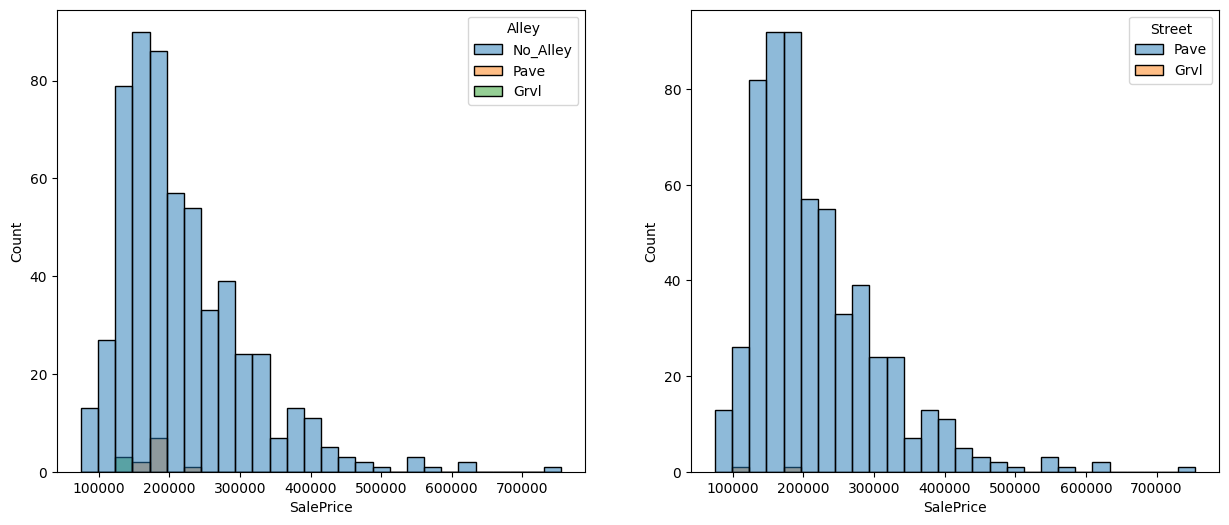

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df.loc[:,["Alley","SalePrice"]],ax =axes[0] ,x="SalePrice",hue= "Alley",)

sns.histplot(df.loc[:,["Street","SalePrice"]],ax= axes[1],x="SalePrice",hue= "Street")


g = df.loc[:,["Street","SalePrice"]].groupby("Street").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["Street"] = df["Street"].map(g['median'])

g = df.loc[:,["Alley","SalePrice"]].groupby("Alley").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["Alley"] = df["Alley"].map(g['mean'])

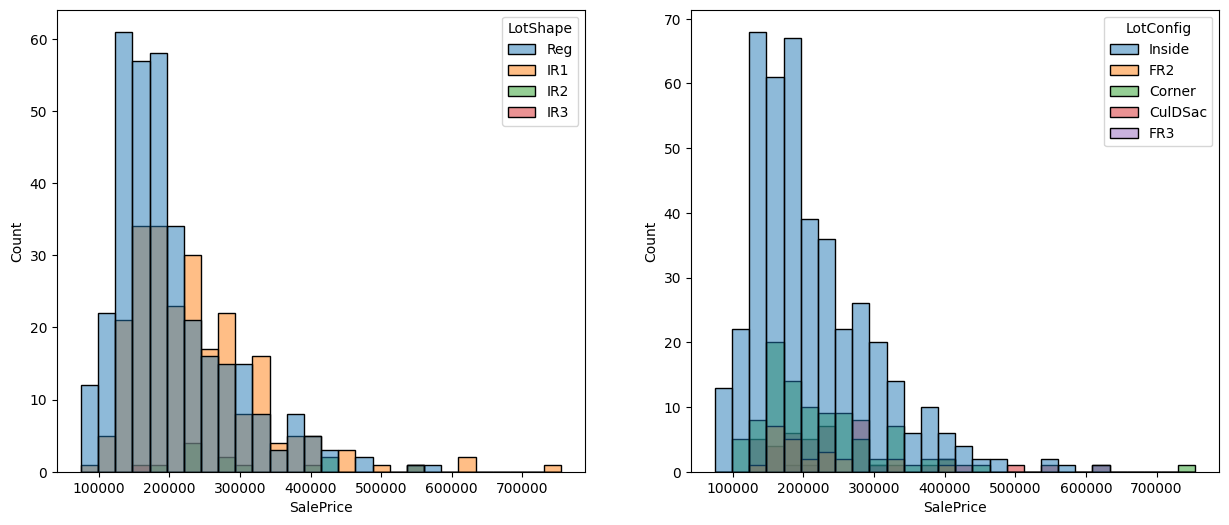

,mean,median,min,max,count
LotShape,,,,,
IR3,160000.000000,160000.0,160000,160000,1
Reg,200246.687135,176000.0,75000,582933,342
IR1,235528.570815,220000.0,79900,755000,233
IR2,312902.833333,276000.0,185000,538000,12


,mean,median,min,max,count
LotConfig,,,,,
Inside,211406.073460,187250.0,75000,611657,422
FR2,211533.695652,190000.0,139000,394617,23
Corner,221834.177083,199250.0,110000,755000,96
FR3,235300.000000,207000.0,183900,315000,3
CulDSac,254471.340909,223250.0,127500,625000,44


,mean,median,min,max,count
LandContour,,,,,
Bnk,155839.777778,159500.0,89471,217500,9
Lvl,214130.720293,190000.0,75000,755000,547
Low,242050.000000,260000.0,168000,302000,10
HLS,287490.727273,279231.5,94750,538000,22


,mean,median,min,max,count
Utilities,,,,,
NoSeWa,137500.000000,137500.0,137500,137500,1
AllPub,216592.603066,192500.0,75000,755000,587


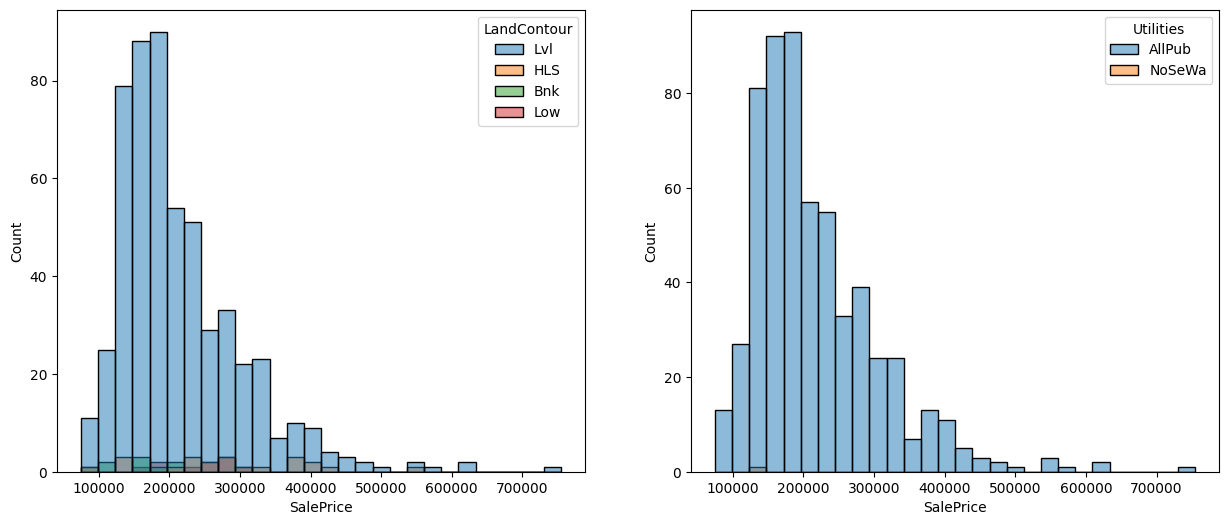

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df.loc[:,["LotShape","SalePrice"]],ax =axes[0] ,x="SalePrice",hue= "LotShape",)
sns.histplot(df.loc[:,["LotConfig","SalePrice"]],ax= axes[1],x="SalePrice",hue= "LotConfig")
plt.show()
g = df.loc[:,["LotShape","SalePrice"]].groupby("LotShape").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["LotShape"] = df["LotShape"].map(g['median'])

g = df.loc[:,["LotConfig","SalePrice"]].groupby("LotConfig").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)
df["LotConfig"] = df["LotConfig"].map(g['median'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df.loc[:,["LandContour","SalePrice"]],ax =axes[0] ,x="SalePrice",hue= "LandContour",)
sns.histplot(df.loc[:,["Utilities","SalePrice"]],ax= axes[1],x="SalePrice",hue= "Utilities")
g = df.loc[:,["LandContour","SalePrice"]].groupby("LandContour").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["LandContour"] = df["LandContour"].map(g['median'])


g = df.loc[:,["Utilities","SalePrice"]].groupby("Utilities").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)
df["Utilities"] = df["Utilities"].map(g['median'])

In [ ]:
g = df.loc[:,["Condition2","SalePrice"]].groupby("Condition2").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)

,mean,median,min,max,count
Condition2,,,,,
RRAn,136905.000000,136905.0,136905,136905,1
Norm,216360.176068,192500.0,75000,755000,585
PosN,284875.000000,284875.0,184750,385000,2


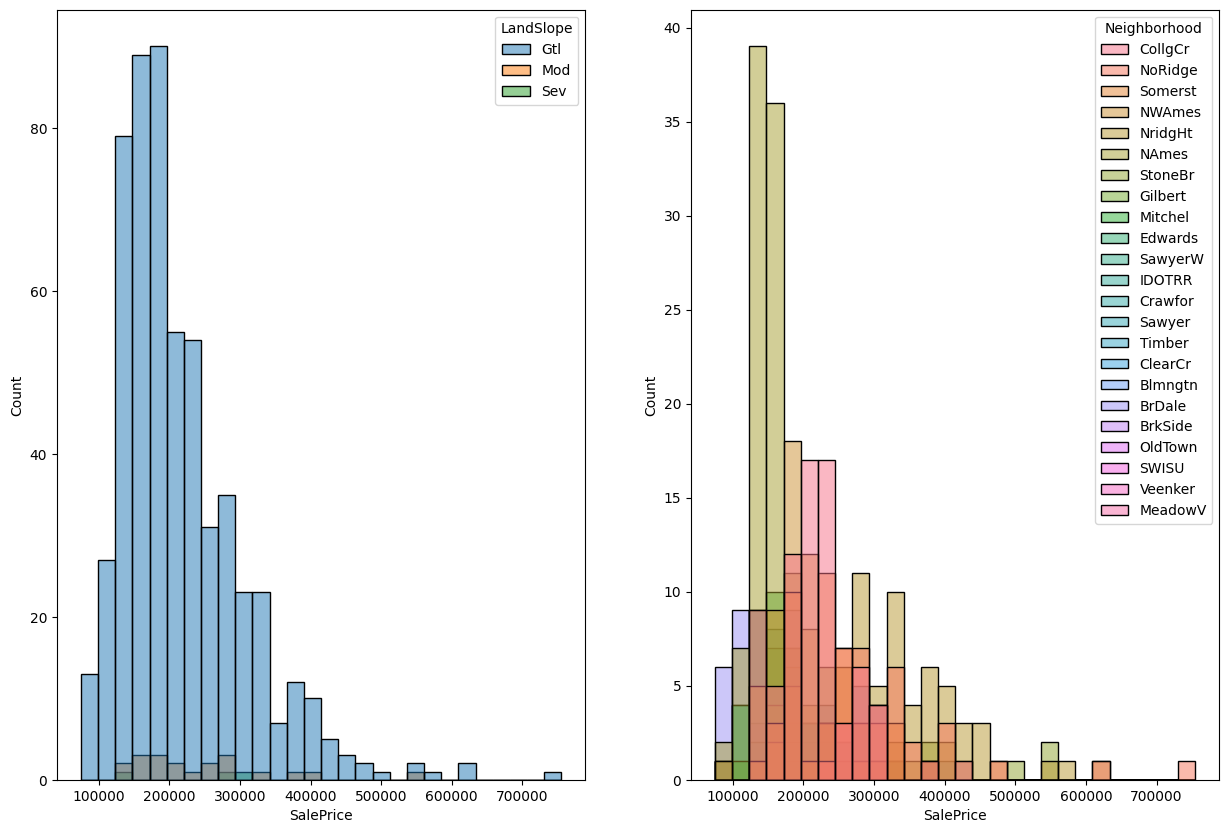

,mean,median,min,max,count
LandSlope,,,,,
Gtl,215160.810619,192000.0,75000,755000,565
Mod,249875.000000,227500.0,124000,538000,20
Sev,238000.000000,277000.0,135000,302000,3


,mean,median,min,max,count
Neighborhood,,,,,
MeadowV,75000.000000,75000.0,75000,75000,1
BrDale,103126.666667,106000.0,83000,122500,15
BrkSide,106300.000000,110000.0,79900,129000,3
OldTown,120894.200000,124500.0,89471,140000,5
Sawyer,140059.090909,138000.0,109900,172500,22
Edwards,149512.000000,144500.0,94750,320000,25
NAmes,153306.862745,149250.0,87500,244000,102
Mitchel,174406.666667,165500.0,115000,271000,15
IDOTRR,169500.000000,169500.0,169500,169500,1


,mean,median,min,max,count
Condition1,,,,,
RRAe,127750.000000,127750.0,125000,130500,2
Artery,149275.000000,144750.0,119200,200000,8
Feedr,163741.153846,153818.5,118500,244600,26
RRNe,187000.000000,187000.0,187000,187000,1
Norm,220126.249524,195000.0,75000,755000,525
PosN,227068.181818,200000.0,155000,385000,11
RRAn,205669.625000,205500.0,129000,282922,8
PosA,212500.000000,210000.0,180000,250000,4
RRNn,274666.666667,290000.0,214000,320000,3


,mean,median,min,max,count
Condition2,,,,,
RRAn,136905.000000,136905.0,136905,136905,1
Norm,216360.176068,192500.0,75000,755000,585
PosN,284875.000000,284875.0,184750,385000,2


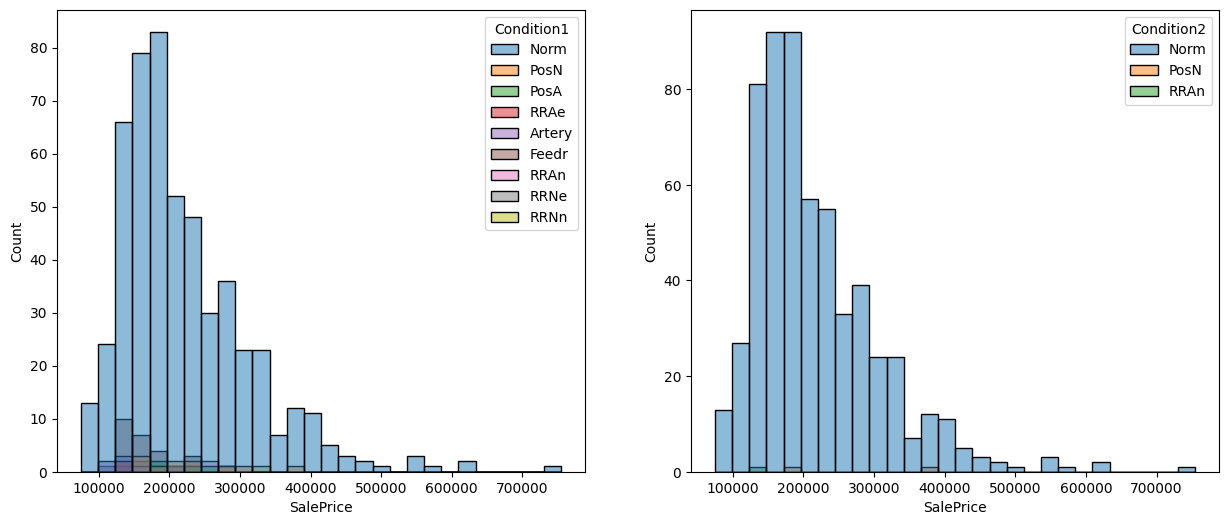

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.histplot(df.loc[:,["LandSlope","SalePrice"]],ax =axes[0] ,x="SalePrice",hue= "LandSlope",)
sns.histplot(df.loc[:,["Neighborhood","SalePrice"]],ax= axes[1],x="SalePrice",hue= "Neighborhood")
plt.show()
g = df.loc[:,["LandSlope","SalePrice"]].groupby("LandSlope").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["LandSlope"] = df["LandSlope"].map(g['median'])

g = df.loc[:,["Neighborhood","SalePrice"]].groupby("Neighborhood").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)
df["Neighborhood"] = df["Neighborhood"].map(g['median'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df.loc[:,["Condition1","SalePrice"]],ax =axes[0] ,x="SalePrice",hue= "Condition1",)
sns.histplot(df.loc[:,["Condition2","SalePrice"]],ax= axes[1],x="SalePrice",hue= "Condition2")
g = df.loc[:,["Condition1","SalePrice"]].groupby("Condition1").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["Condition1"] = df["Condition1"].map(g['median'])


g = df.loc[:,["Condition2","SalePrice"]].groupby("Condition2").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["Condition2"] = df["Condition2"].map(g['median'])

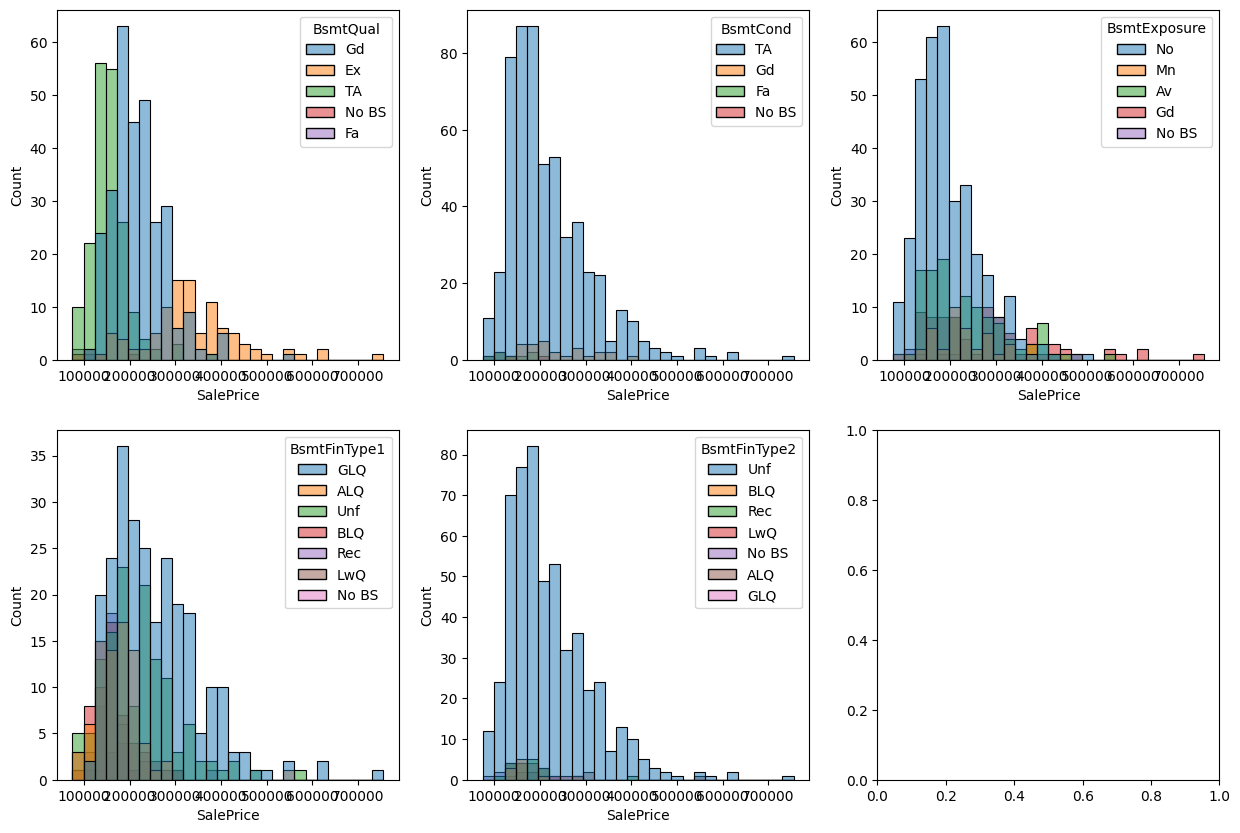

,mean,median,min,max,count
BsmtQual,,,,,
Fa,93123.666667,89471.0,79900,110000,3
No BS,133000.000000,120000.0,87500,198500,5
TA,154676.888298,149500.0,75000,381000,188
Gd,218320.772109,212950.0,118500,538000,294
Ex,337422.704082,320000.0,147000,755000,98


,mean,median,min,max,count
BsmtCond,,,,,
No BS,133000.000000,120000.0,87500,198500,5
Fa,139514.285714,137900.0,83000,187500,7
TA,217356.332727,192500.0,75000,755000,550
Gd,234222.115385,212250.0,127500,402000,26


,mean,median,min,max,count
BsmtExposure,,,,,
No BS,142916.666667,132000.0,87500,198500,6
No,194406.390029,178000.0,75000,501837,341
Av,232423.483051,212950.0,118500,556581,118
Mn,229093.666667,220000.0,79900,381000,42
Gd,284930.543210,275000.0,127500,755000,81


,mean,median,min,max,count
BsmtFinType1,,,,,
No BS,133000.000000,120000.0,87500,198500,5
Rec,159262.420000,153650.0,89471,381000,50
BLQ,163589.622642,157000.0,83000,311500,53
LwQ,170868.421053,158000.0,110000,301000,19
ALQ,175521.428571,175000.0,82500,538000,77
Unf,218439.360902,213000.0,75000,582933,133
GLQ,255637.059761,231500.0,118500,755000,251


,mean,median,min,max,count
BsmtFinType2,,,,,
No BS,158166.666667,132000.0,87500,284000,6
BLQ,168275.000000,153500.0,139000,271900,10
Rec,179127.777778,170500.0,119000,402000,18
LwQ,178847.058824,175500.0,128000,250000,17
Unf,219753.234848,195700.0,75000,755000,528
GLQ,232000.000000,232000.0,232000,232000,1
ALQ,264900.000000,233000.0,158000,555000,8


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(df.loc[:,["BsmtQual","SalePrice"]],ax =axes[0,0] ,x="SalePrice",hue= "BsmtQual",)
sns.histplot(df.loc[:,["BsmtCond","SalePrice"]],ax= axes[0,1],x="SalePrice",hue= "BsmtCond")
sns.histplot(df.loc[:,["BsmtExposure","SalePrice"]],ax =axes[0,2] ,x="SalePrice",hue= "BsmtExposure",)
sns.histplot(df.loc[:,["BsmtFinType1","SalePrice"]],ax= axes[1,0],x="SalePrice",hue= "BsmtFinType1")
sns.histplot(df.loc[:,["BsmtFinType2","SalePrice"]],ax= axes[1,1],x="SalePrice",hue= "BsmtFinType2")
plt.show()

g = df.loc[:,["BsmtQual","SalePrice"]].groupby("BsmtQual").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["BsmtQual"] = df["BsmtQual"].map(g['median'])

g = df.loc[:,["BsmtCond","SalePrice"]].groupby("BsmtCond").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["BsmtCond"] = df["BsmtCond"].map(g['median'])

g = df.loc[:,["BsmtExposure","SalePrice"]].groupby("BsmtExposure").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)


df["BsmtExposure"] = df["BsmtExposure"].map(g['median'])

g = df.loc[:,["BsmtFinType1","SalePrice"]].groupby("BsmtFinType1").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["BsmtFinType1"] = df["BsmtFinType1"].map(g['median'])

g = df.loc[:,["BsmtFinType2","SalePrice"]].groupby("BsmtFinType2").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["BsmtFinType2"] = df["BsmtFinType2"].map(g['median'])

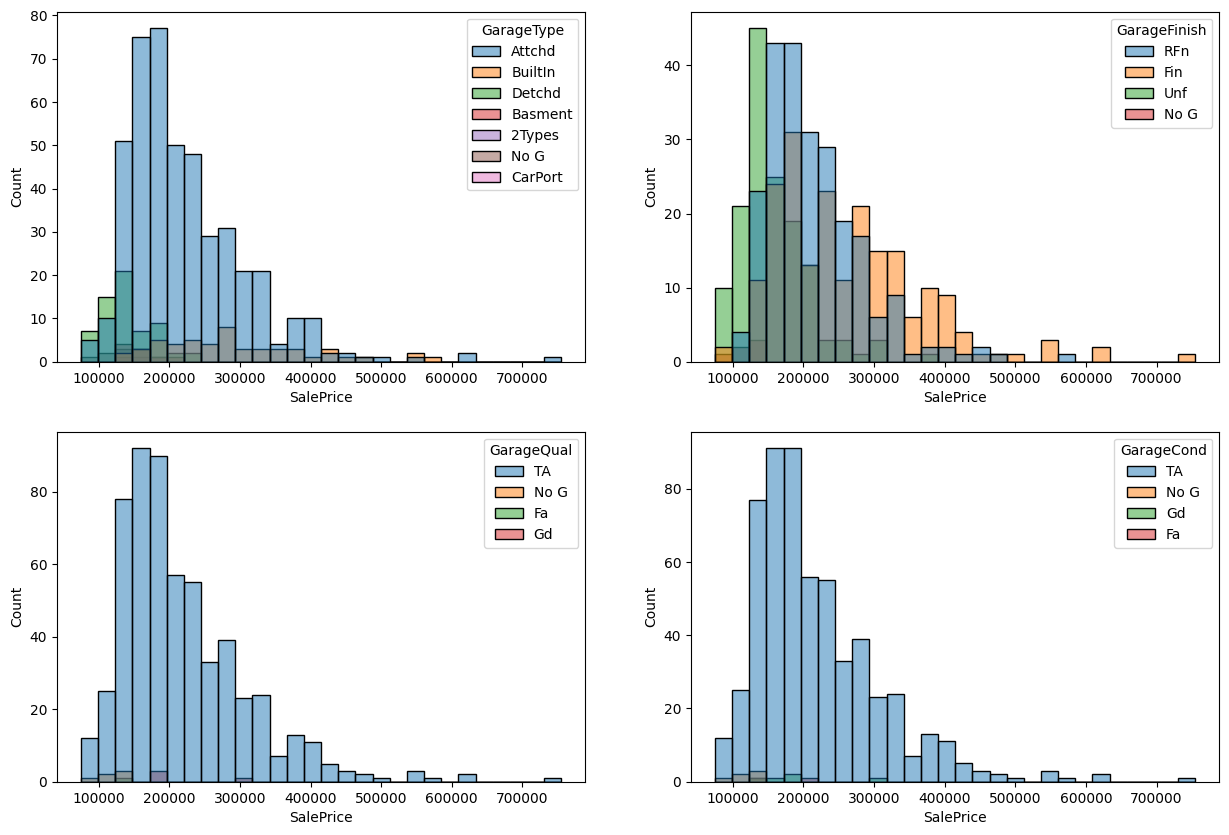

,mean,median,min,max,count
GarageType,,,,,
No G,120083.333333,121250.0,91500,141000,6
Detchd,138722.952381,135000.0,79900,239000,63
CarPort,146950.000000,146950.0,129000,164900,2
Basment,158555.555556,148000.0,137500,217000,9
2Types,168925.000000,169500.0,150000,186700,4
Attchd,221381.068584,200750.0,75000,755000,452
BuiltIn,295316.711538,278500.0,130000,582933,52


,mean,median,min,max,count
GarageFinish,,,,,
No G,120083.333333,121250.0,91500,141000,6
Unf,156405.750000,144950.0,75000,381000,144
RFn,214265.948718,199250.0,100000,582933,234
Fin,264197.049020,243000.0,82500,755000,204


,mean,median,min,max,count
GarageQual,,,,,
No G,120083.333333,121250.0,91500,141000,6
Fa,131500.000000,131500.0,131500,131500,1
Gd,210475.000000,182500.0,174900,302000,4
TA,217648.974003,193500.0,75000,755000,577


,mean,median,min,max,count
GarageCond,,,,,
No G,120083.333333,121250.0,91500,141000,6
Gd,189980.000000,174900.0,145000,302000,5
Fa,178500.000000,178500.0,137000,220000,2
TA,217826.013913,193500.0,75000,755000,575


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df.loc[:,["GarageType","SalePrice"]],ax =axes[0,0] ,x="SalePrice",hue= "GarageType",)
sns.histplot(df.loc[:,["GarageFinish","SalePrice"]],ax= axes[0,1],x="SalePrice",hue= "GarageFinish")
sns.histplot(df.loc[:,["GarageQual","SalePrice"]],ax =axes[1,0] ,x="SalePrice",hue= "GarageQual",)
sns.histplot(df.loc[:,["GarageCond","SalePrice"]],ax= axes[1,1],x="SalePrice",hue= "GarageCond")
plt.show()

g = df.loc[:,["GarageType","SalePrice"]].groupby("GarageType").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)
df["GarageType"] = df["GarageType"].map(g['median'])

g = df.loc[:,["GarageFinish","SalePrice"]].groupby("GarageFinish").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["GarageFinish"] = df["GarageFinish"].map(g['median'])

g = df.loc[:,["GarageQual","SalePrice"]].groupby("GarageQual").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)
df["GarageQual"] = df["GarageQual"].map(g['median'])

g = df.loc[:,["GarageCond","SalePrice"]].groupby("GarageCond").agg(
    mean= ("SalePrice",'mean'),
    median= ("SalePrice",'median'),
    min= ("SalePrice",'min'),
    max= ("SalePrice",'max'),
    count = ("SalePrice",'size')
).sort_values('median')
display(g)
g =g.div(10**4).round(1)

df["GarageCond"] = df["GarageCond"].map(g['median'])

In [ ]:
colnames= pd.DataFrame(df.dtypes[df.dtypes == "object"]).index

,mean,median,min,max,count
LotFrontage,,,,,
3.9,39811.428571,38900.0,30000.0,47800.0,5.6
4.4,50600.000000,44000.0,44000.0,70400.0,1.6
5.1,51100.000000,51100.0,35000.0,67200.0,0.8
5.2,52200.000000,52200.0,52200.0,52200.0,0.4
5.3,69466.666667,52600.0,47400.0,108400.0,1.2
...,...,...,...,...,...
15.8,151641.466667,158000.0,102520.0,233173.2,3.6
16.1,161200.000000,161200.0,161200.0,161200.0,0.4
16.4,142287.200000,164000.0,88000.0,174861.6,1.2


,mean,median,min,max,count
BldgType,,,,,
5.4,56684.000000,53500.0,30000.0,92000.0,12.0
5.5,55790.295652,54762.0,35000.0,82520.0,9.2
5.9,59400.000000,59400.0,51600.0,67200.0,1.6
7.0,77087.226230,70360.0,35800.0,157000.0,24.4
8.3,91462.394894,83200.0,31960.0,302000.0,188.0


,mean,median,min,max,count
HouseStyle,,,,,
5.6,61647.292308,56000.0,47400.0,82520.0,5.2
6.6,66648.292683,65560.0,50000.0,110000.0,16.4
7.7,84617.215238,76800.0,31960.0,244662.8,126.0
8.2,90685.714286,81500.0,44000.0,164000.0,5.6
8.6,94892.320000,85960.0,30000.0,302000.0,82.0


,mean,median,min,max,count
RoofStyle,,,,,
5.1,51300.000000,51300.0,51000.0,51600.0,0.8
5.6,55600.000000,55600.0,55600.0,55600.0,0.4
7.0,75866.666667,70000.0,60800.0,96800.0,1.2
7.5,80804.955831,75000.0,30000.0,302000.0,161.2
9.3,100339.363128,92800.0,33000.0,250000.0,71.6


,mean,median,min,max,count
RoofMatl,,,,,
5.2,56200.000000,51600.0,51000.0,66000.0,1.2
5.5,54800.000000,54800.0,54800.0,54800.0,0.4
6.4,64000.000000,64000.0,64000.0,64000.0,0.4
7.7,86470.022798,77000.0,30000.0,250000.0,231.6
9.4,94000.000000,94000.0,91200.0,96800.0,0.8
18.5,184700.000000,184700.0,67400.0,302000.0,0.8


,mean,median,min,max,count
Exterior1st,,,,,
5.8,58000.000000,58000.0,54800.0,61200.0,0.8
6.2,68435.813953,62000.0,44000.0,136400.0,17.2
6.3,72000.000000,63000.0,48000.0,138000.0,2.4
6.4,69119.683200,64000.0,33200.0,302000.0,50.0
6.7,74639.107692,67000.0,31960.0,156800.0,26.0
7.2,74609.676596,72000.0,33000.0,120800.0,18.8
8.6,86000.000000,86000.0,86000.0,86000.0,0.4
9.2,99427.573333,92000.0,44000.0,244662.8,108.0
11.5,120365.558621,114836.0,30000.0,222632.4,11.6


,mean,median,min,max,count
Exterior2nd,,,,,
5.4,81120.000000,54000.0,35200.0,136400.0,2.0
5.8,58000.000000,58000.0,54800.0,61200.0,0.8
6.1,64824.102564,61200.0,44000.0,120800.0,15.6
6.3,62800.000000,62800.0,55600.0,70000.0,0.8
6.4,70997.680000,64000.0,35000.0,152400.0,2.0
6.6,70029.929825,65780.0,33200.0,302000.0,45.6
6.7,75253.903226,67300.0,31960.0,156800.0,24.8
6.9,87710.000000,69100.0,48000.0,215200.0,4.0
7.2,73768.680702,72000.0,33000.0,120800.0,22.8


,mean,median,min,max,count
MasVnrType,,,,,
5.6,58527.226667,55600.0,35788.4,110800.0,6.0
7.2,81876.748764,72400.0,30000.0,302000.0,178.0
9.9,106233.450000,98735.6,47600.0,244662.8,51.2


,mean,median,min,max,count
ExterQual,,,,,
6.2,63751.993916,62000.0,30000.0,152400.0,105.2
9.2,97653.456115,92100.0,52000.0,250000.0,111.2
14.7,148861.872340,146917.6,64000.0,302000.0,18.8


,mean,median,min,max,count
ExterCond,,,,,
5.2,54300.000000,51700.0,46000.0,67800.0,1.6
7.4,79636.279070,74000.0,31960.0,250000.0,17.2
7.8,87374.090943,77680.4,30000.0,302000.0,216.4


,mean,median,min,max,count
Foundation,,,,,
5.2,54500.000000,51800.0,35000.0,79400.0,1.6
5.3,52796.133333,52600.0,35788.4,70000.0,1.2
6.3,65928.821224,62800.0,30000.0,161144.4,98.0
9.4,102327.361905,93800.0,31960.0,302000.0,134.4


,mean,median,min,max,count
Heating,,,,,
3.5,35000.000000,35000.0,35000.0,35000.0,0.4
5.5,54600.000000,54600.0,51600.0,57600.0,0.8
7.7,86780.757607,77000.0,30000.0,302000.0,234.0


,mean,median,min,max,count
HeatingQC,,,,,
6.0,61466.210072,60400.0,33000.0,120800.0,55.6
7.0,72126.849315,69600.0,31960.0,158000.0,29.2
7.1,65432.200000,71300.0,30000.0,94000.0,4.0
9.2,99583.491803,92000.0,44400.0,302000.0,146.4


,mean,median,min,max,count
CentralAir,,,,,
5.2,49926.666667,52100.0,35000.0,58000.0,2.4
7.7,86961.139519,77300.0,30000.0,302000.0,232.8


,mean,median,min,max,count
Electrical,,,,,
5.2,52583.333333,52300.0,37900.0,67800.0,2.4
5.8,57006.666667,57700.0,35000.0,66400.0,4.8
7.8,87563.795088,77940.0,30000.0,302000.0,228.0


,mean,median,min,max,count
KitchenQual,,,,,
5.4,53720.000000,54000.0,47200.0,59960.0,1.2
6.2,61675.019355,61600.0,30000.0,110800.0,86.8
8.9,92280.580471,88800.0,44000.0,250000.0,118.8
13.0,140267.205634,130000.0,60000.0,302000.0,28.4


,mean,median,min,max,count
Functional,,,,,
4.4,44000.000000,44000.0,44000.0,44000.0,0.4
5.2,54100.000000,52000.0,51600.0,62000.0,2.4
5.5,106320.000000,55160.0,48600.0,215200.0,1.2
6.1,61148.888889,60800.0,46000.0,84000.0,3.6
6.3,63050.000000,63300.0,52000.0,73600.0,1.6
7.8,87470.518938,78000.0,30000.0,302000.0,226.0


,mean,median,min,max,count
FireplaceQu,,,,,
5.7,55766.666667,57400.0,37800.0,68800.0,2.4
6.1,64952.777551,61100.0,30000.0,137057.2,78.4
6.3,65612.000000,63200.0,50000.0,82000.0,6.0
8.0,87209.914634,79580.0,33000.0,250000.0,65.6
10.0,105635.744503,100000.0,47600.0,244662.8,76.4
14.2,148910.350000,142250.0,79400.0,302000.0,6.4


,mean,median,min,max,count
PavedDrive,,,,,
5.0,54133.333333,49800.0,36600.0,76000.0,1.2
6.3,62353.333333,63160.0,37900.0,86000.0,1.2
7.7,86875.400687,77100.0,30000.0,302000.0,232.8


,mean,median,min,max,count
PoolQC,,,,,
6.4,64000.000000,64000.0,64000.0,64000.0,0.4
7.7,86623.150769,77000.0,30000.0,302000.0,234.0
8.6,86200.000000,86200.0,72400.0,100000.0,0.8


,mean,median,min,max,count
Fence,,,,,
5.8,62059.047619,57600.0,39440.0,152400.0,8.4
5.9,61700.000000,59000.0,54000.0,74800.0,1.6
6.2,64369.313043,61800.0,35788.4,120400.0,18.4
7.0,73874.545455,70300.0,46000.0,104000.0,8.8
8.2,90453.888485,82000.0,30000.0,302000.0,198.0


,mean,median,min,max,count
MiscFeature,,,,,
6.7,74232.307692,67400.0,59200.0,110800.0,5.2
7.7,86839.587456,77100.0,30000.0,302000.0,229.6
10.0,100000.000000,100000.0,100000.0,100000.0,0.4


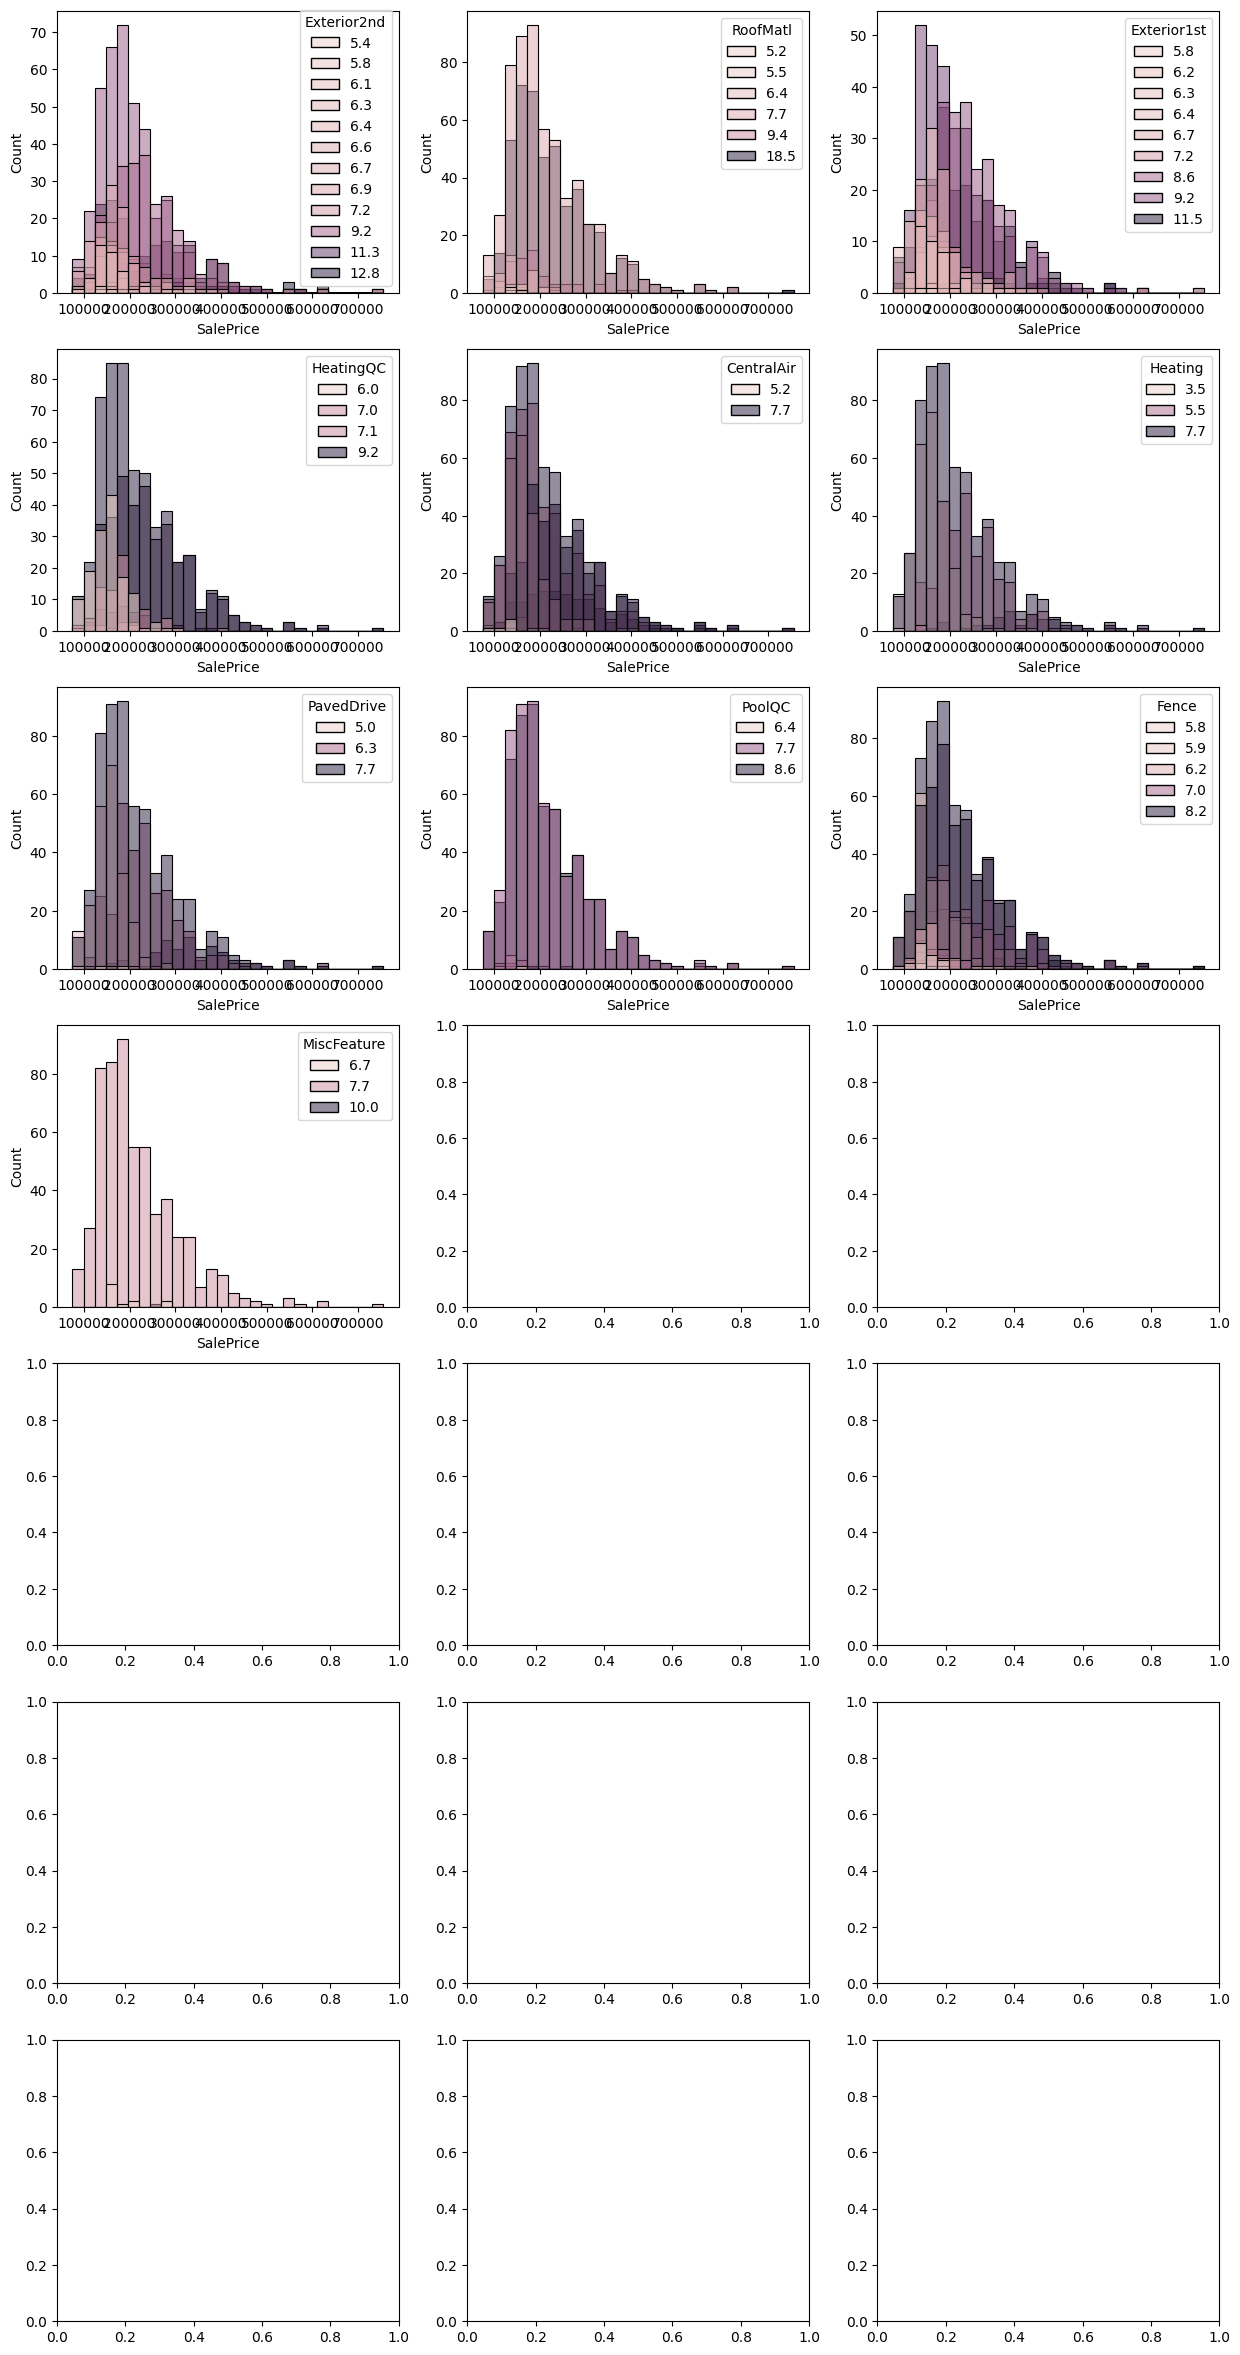

In [ ]:
fig, axes = plt.subplots(7, 3, figsize=(15, 30))

for idx,n in enumerate(colnames):
    sns.histplot(df[[n,"SalePrice"]],ax =axes[int(idx/7),idx-3*int(idx/3)] ,x="SalePrice",hue= n)
    g = df[[n,"SalePrice"]].groupby(n).agg(
        mean= ("SalePrice",'mean'),
        median= ("SalePrice",'median'),
        min= ("SalePrice",'min'),
        max= ("SalePrice",'max'),
        count = ("SalePrice",'size')
    ).sort_values('median')/10*4
    display(g)
    g =g.div(10**4).round(1)

    df[n] = df[n].map(g['median'])
plt.show()

In [ ]:
  pd.DataFrame(df.isnull().sum()).T

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
c=df.shape[1]
scX = StandardScaler()
#scy = StandardScaler()

x_train  = scX.fit_transform(X=df.iloc[:,:c] )
#y_train =scy.fit_transform(housesTrain.iloc[:,-1].values.reshape(-1,1)  )
y_train = np.log(df.iloc[:,-1].values.reshape(-1,1)  )


#**MODELLING** & **HYPERPARAMETER TUNING**

In [ ]:
LR =LinearRegression( fit_intercept=True)

LR.fit(x_train ,y_train)
print(LR.coef_)
print(LR.intercept_)
print(LR.score(x_train ,y_train))
print(mean_squared_error(y_train,LR.predict(x_train)) )
print(mean_absolute_error(y_train,LR.predict(x_train)) )

[[-6.80559517e-04  7.78877366e-03  2.04757628e-02 -1.22858206e-03
   4.89014664e-04  1.19218325e-03 -8.09960630e-03 -1.23969187e-03
   2.50439932e-03  7.80106361e-03  3.56202325e-03  6.39253686e-03
   2.11213890e-02 -8.91215162e-05 -6.93307197e-03  2.07486993e-02
   1.89526025e-03  2.82463209e-02  1.63914308e-02  4.12781905e-02
   7.05096863e-03 -4.32898617e-03 -1.21193750e-02  5.07444746e-03
  -4.63624447e-03  2.38650755e-03 -1.70299255e-03 -1.10826726e-02
   4.37888912e-04  2.60408201e-03 -2.49885974e-03  9.99168380e-03
  -1.39051831e-03  8.18801839e-04  1.47537691e+09 -8.25446055e-04
   3.89745624e+08  1.44446768e+09 -1.36692813e+09  5.91410445e-03
   1.03403250e-02 -7.04249980e-03 -4.44648889e-03  3.67447177e+09
   4.24727344e+09  7.84196253e+03 -4.79434982e+09  1.49719057e-02
   4.95475489e-03  5.54015874e-03  5.04028686e-03  1.99246278e-02
   2.30364144e-03  5.01272128e-04 -9.47240051e-03  1.22672823e-02
   1.38996164e-02  3.05224842e-03  8.75133489e-04  1.29972310e-04
   3.50657

In [ ]:
lr = LinearRegression()
# fit optimal linear regression line on training data, this performs gradient descent under the hood
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# given our model and our fit, predict y_values using X_test set
yr_hat = lr.predict(x_train)

In [ ]:
# evaluate the algorithm with a test set
lr_score = lr.score(x_train, y_train)  # train test
print("Accuracy: ", lr_score)

Accuracy:  0.9745754822817989


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# cross validation to find 'validate' score across multiple samples, automatically does Kfold stratifying
lr_cv = cross_val_score(lr, x_train, y_train, cv = 5, scoring= 'r2')
print("Cross-validation results: ", lr_cv)
print("R2: ", lr_cv.mean())

Cross-validation results:  [ 9.55068496e-01  9.63840995e-01  9.39832935e-01 -6.76153068e+22
 -3.10299244e+23]
R2:  -7.558291009654218e+22


In [ ]:
LRLasso = Lasso(alpha=0.0075, fit_intercept=True,
            precompute=True, max_iter=1000, tol=0.0001,
            warm_start=True, random_state=611)

LRLasso.fit(x_train ,y_train)
print(LRLasso.coef_)
print(LRLasso.intercept_)
print(LRLasso.score(x_train ,y_train))
print(mean_squared_error(y_train,LRLasso.predict(x_train)) )
print(mean_absolute_error(y_train,LRLasso.predict(x_train)) )

[-0.00000000e+00 -0.00000000e+00  1.80389632e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  3.27466294e-04  0.00000000e+00  0.00000000e+00  1.34361918e-03
  1.94856235e-02  0.00000000e+00 -0.00000000e+00  1.46153167e-02
  0.00000000e+00  1.71896971e-02  1.14888945e-04  1.18207369e-02
  1.49906803e-02 -0.00000000e+00 -2.46276696e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.67479656e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.27099660e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.48071009e-03
  0.00000000e+00  1.00377588e-02  0.00000000e+00  6.09425636e-03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  5.07274746e-03
  1.26599546e-02  0.00000000e+00  0.00000000e+00  2.59598269e-03
  3.24932914e-03  1.69413

In [ ]:
LRRidge= Ridge(alpha=35, fit_intercept=True,
             max_iter=1000, tol=0.00001,
             random_state=611)

LRRidge.fit(x_train ,y_train)
print(LRRidge.coef_)
print(LRRidge.intercept_)
print(LRRidge.score(x_train ,y_train))
print(mean_squared_error(y_train,LRRidge.predict(x_train)) )
print(mean_absolute_error(y_train,LRRidge.predict(x_train)) )

[[ 0.00039854 -0.00293532  0.01816282  0.00669545  0.00383408  0.00119141
  -0.00562692 -0.00100488  0.00559272  0.00922605  0.00629247  0.00290085
   0.03310154  0.00326186 -0.01526767  0.0145208   0.00057312  0.03498466
   0.01532911  0.02347735  0.01035699 -0.00138196 -0.00511515  0.0014606
   0.00171063  0.00294485  0.00399238 -0.00284481  0.00061675  0.00686392
   0.00437507  0.00771317  0.00546067  0.0041836   0.00558601 -0.00032783
   0.00716672 -0.00611166  0.00161426  0.0021043   0.00939947 -0.00506537
  -0.00170732  0.02107512  0.00374154  0.          0.01946693  0.01482788
   0.00495276  0.00937357  0.00594135  0.01329769 -0.00395369  0.00682564
   0.00345807  0.01503421  0.01473626  0.00407902  0.00030617  0.00532331
   0.00406024  0.01222831  0.00738234  0.00435002 -0.00176471 -0.0006591
   0.00590531  0.00573792  0.00550777  0.00578737  0.01076033 -0.02408453
   0.03015042  0.00261548 -0.00392146 -0.00038829  0.00103347 -0.00113987
  -0.01359391  0.02142108  0.16843392]]


In [ ]:
#rfr = RandomForestRegressor(n_estimators = 100, max_depth = 5, min_samples_leaf= 5, max_features = 'sqrt')  # using GridSearch
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train) # gets the parameters for the rfr model
rfr_cv = cross_val_score(rfr,x_train, y_train, cv = 5, scoring = 'r2')
print("R2: ", rfr_cv.mean())

<ipython-input-99-5c1236fd4a1b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train, y_train) # gets the parameters for the rfr model
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

R2:  0.9981293925999116


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model Random Forest Regression
random_forest_reg = RandomForestRegressor()

# Ruang parameter yang akan dijelajahi
param_grid_random_forest = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Inisialisasi RandomizedSearchCV
random_search_random_forest = RandomizedSearchCV(estimator=random_forest_reg, param_distributions=param_grid_random_forest,
                                                n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=2,
                                                random_state=42, n_jobs=-1)

# Lakukan pencarian hyperparameter pada data latih
random_search_random_forest.fit(x_train, y_train)

# Cetak parameter terbaik yang ditemukan
print("Best parameters found for Random Forest Regression: ", random_search_random_forest.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters found for Random Forest Regression:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}


In [ ]:
# Random forest determined feature importances
rfr.feature_importances_

array([9.04253014e-05, 5.65682454e-06, 1.55380012e-06, 7.89974056e-05,
       5.21462989e-05, 1.16435501e-09, 3.29800537e-08, 1.02343855e-05,
       3.93766842e-06, 4.71185747e-17, 1.01592168e-05, 4.02509732e-07,
       2.77107852e-05, 3.50042974e-07, 5.18188037e-08, 3.79153623e-06,
       4.07811648e-06, 3.91426174e-06, 6.60599283e-05, 3.60111392e-05,
       7.98180065e-05, 3.12870237e-05, 5.99376957e-05, 2.25717228e-05,
       4.92883782e-05, 4.88842936e-06, 1.64263524e-04, 5.95098379e-07,
       4.27839255e-06, 2.16134839e-06, 3.27924959e-06, 2.45026843e-06,
       3.47684184e-05, 1.19775523e-05, 8.20541486e-05, 3.12138642e-06,
       1.25130381e-06, 3.45512585e-05, 5.23626572e-05, 4.10820992e-09,
       9.59784278e-06, 1.95414111e-08, 3.62994800e-07, 8.22927363e-05,
       2.04580370e-05, 0.00000000e+00, 4.05360376e-05, 8.87225827e-06,
       3.98330637e-05, 6.33827549e-06, 2.93393060e-06, 1.77101842e-05,
       3.32449809e-08, 2.17127309e-06, 2.22110900e-05, 6.78609121e-07,
      

In [ ]:
importance = rfr.feature_importances_

In [ ]:
# Membuat DataFrame yang berisi pasangan fitur dan nilai feature importance
feature_importances = pd.DataFrame(list(zip(importance, df.columns)), columns=['Importance', 'Feature'])

# Menampilkan DataFrame feature_importances
print(feature_importances)


    Importance        Feature
0     0.000090             Id
1     0.000006     MSSubClass
2     0.000002       MSZoning
3     0.000079    LotFrontage
4     0.000052        LotArea
..         ...            ...
76    0.000164         MoSold
77    0.000026         YrSold
78    0.000012       SaleType
79    0.000008  SaleCondition
80    0.998272      SalePrice

[81 rows x 2 columns]


In [ ]:
sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

In [ ]:
import xgboost as xgb
# Define  model as an object of XGBRegressor
xgb_regress = xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.1)
xgb_regress.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
training_score = xgb_regress.score(x_train, y_train)
print(f"Training score: {training_score:.2f}")

Training score: 1.00


In [ ]:
# Evaluasi model menggunakan Mean Squared Error (MSE) pada data latih
mse_train = mean_squared_error(y_train, xgb_regress.predict(x_train))
print(f"Mean Squared Error (MSE) on training data: {mse_train:.2f}")

Mean Squared Error (MSE) on training data: 0.00


In [ ]:
# Evaluasi model menggunakan Mean Absolute Error (MAE) pada data latih
mae_train = mean_absolute_error(y_train, xgb_regress.predict(x_train))
print(f"Mean Absolute Error (MAE) on training data: {mae_train:.2f}")

Mean Absolute Error (MAE) on training data: 0.00


In [ ]:
# Evaluasi model menggunakan Root Mean Squared Error (RMSE) pada data latih
rmse_train = np.sqrt(mean_squared_error(y_train, xgb_regress.predict(x_train)))
print(f"Root Mean Squared Error (RMSE) on training data: {rmse_train:.2f}")

Root Mean Squared Error (RMSE) on training data: 0.00


In [ ]:
# Define  model as an object of XGBRegressor
model_XGboost = XGBRegressor(n_estimators=350,max_depth=15,learning_rate=.1,random_state=1,
                     n_jobs=10, subsample=1,min_child_weight=0.6)

In [ ]:
# Fit the model
model_XGboost.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=0.6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=350, n_jobs=10,
             num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Get validation predictions using RMSE
pred_val_xgboost = model_XGboost.predict(x_train)
print("RMSE is :", mean_squared_error(y_train, pred_val_xgboost, squared=False))

RMSE is : 0.0004011834398966897


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Tentukan ruang parameter yang akan dijelajahi
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Inisialisasi model XGBoost
xgb = XGBRegressor()

# Buat objek RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid,
                                   n_iter=100, scoring='neg_mean_squared_error', cv=5, verbose=2,
                                   random_state=42, n_jobs=-1)

# Lakukan pencarian hipermeter acak pada data latih
random_search.fit(x_train, y_train)

# Cetak parameter terbaik yang ditemukan
print("Best parameters found: ", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'subsample': 1.0, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
